In [20]:
import torch
import os
import lightning.pytorch as pl
from lit_ecology_classifier.models.model import LitClassifier
from lit_ecology_classifier.data.datamodule import DataModule
from torch.utils.data import DataLoader
from scipy.stats import gmean
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Function to load multiple models

# Function to calculate F1 score
def calculates_scores(all_labels, all_preds):
    f1 = f1_score(all_labels, all_preds,average="weighted")
    print("F1 Score: ", f1)
    accuracy = np.mean(np.array(all_labels) == np.array(all_preds))
    print("Accuracy: ", accuracy)
    return f1, accuracy
# Function to denormalize images
def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).view(1, 3, 1, 1)
    std = torch.tensor(std).view(1, 3, 1, 1)
    tensor = tensor * std + mean
    return tensor
f1s=[]
accs=[]
dataset ="zoo"
ckpt="ng657nk5"#["911xctua","gsyka9n2"]
model_path =     f'/beegfs/desy/user/kaechben/eawag/train_out/{dataset}/{ckpt}/checkpoints'
maxacc=0
for i,ckpt in enumerate(os.listdir(model_path)):
    if ckpt.find("val_acc=")!=-1:
        print(ckpt)
        if float(ckpt.split("val_acc=")[1].split(".ckpt")[0])>maxacc:
            best_ckpt=ckpt
            maxacc=float(ckpt.split("val_acc=")[1].split(".ckpt")[0])

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load models
model = LitClassifier.load_from_checkpoint(os.path.join(model_path,best_ckpt))
# Setup DataLoader for validation
trainer = pl.Trainer()
hparams = model.hparams # copy the hyperparameters from the model
model.hparams.batch_size *= 2
model.hparams.use_multi = False
model.hparams.TTA = True
data_module = DataModule(**model.hparams)
data_module.use_multi=False
model.hparams.outpath=f"{dataset}_out"
model.hparams.use_wandb=False
# Initialize the Trainer and Perform Predictions
data_module.setup(stage="fit")
model.load_datamodule(data_module)

trainer = pl.Trainer(devices=1)
preds,labels=[],[]
trainer.test(model, datamodule=data_module)
preds.extend(model.test_step_predictions)
labels.extend(model.test_step_targets)

trainer.validate(model, datamodule=data_module)
preds.extend(model.val_step_predictions)
labels.extend(model.val_step_targets)

accs.append(model.acc)



best_model_acc_stage2-epoch=39-val_acc=0.9277.ckpt
best_model_acc_stage2-epoch=35-val_acc=0.9231.ckpt
best_model_acc_stage2-epoch=37-val_acc=0.9234.ckpt
best_model_acc_stage2-epoch=31-val_acc=0.9231.ckpt
best_model_acc_stage2-epoch=33-val_acc=0.9256.ckpt


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


85,788,899 total parameters.
85,788,899 training parameters.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of classes: 35
Train size: 20649
Validation size: 4424
Test size: 4426


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 20649
Validation size: 4424
Test size: 4426
Testing DataLoader 0: 100%|██████████| 13/13 [01:43<00:00,  0.13it/s]test_balanced_acc 0.857950150470375
test_precision 0.9997712717291857
test_acc tensor(0.9349)
test_f1 0.933818595088756
Testing DataLoader 0: 100%|██████████| 13/13 [02:11<00:00,  0.10it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.8579501509666443
     test_precision         0.9997712969779968
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 20649
Validation size: 4424
Test size: 4426
Validation DataLoader 0: 100%|██████████| 13/13 [02:09<00:00,  0.10it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val_acc            0.9369348883628845
    val_balanced_acc        0.8579652905464172
         val_f1             0.9352874159812927
        val_loss            2.6848127841949463
      val_precision         0.9995444416999817
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [21]:

class_names=[model.inverted_class_map[idx] for idx in range(len(model.class_map))]

ood_labels=[
]
ood_preds=[]

# # Function to plot misclassifications
for ood in range(1,11):
    datapath= "/beegfs/desy/user/kaechben/eawag/training/zoo_ood"+str(ood)+".tar"


    # model.hparams.ood = True
    model.hparams.ood=False

    model.hparams.datapath = datapath
    model.hparams.splits=[0,0]
    data_module = DataModule(**model.hparams)
    data_module.setup(stage="fit")
    model.load_datamodule(data_module)
    trainer = pl.Trainer(devices=1)
    trainer.test(model, datamodule=data_module)
    preds.extend(model.test_step_predictions)
    labels.extend(model.test_step_targets)

    accs.append(model.acc)
    # Prepare data module

/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.8910623692682524
test_precision 1.0
test_acc tensor(0.8700)
test_f1 0.8381105357525575
Testing DataLoader 0: 100%|██████████| 3/3 [00:44<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.8910623788833618
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.6946142388918667
test_precision 0.978891820580475
test_acc tensor(0.8170)
test_f1 0.7990215565104178
Testing DataLoader 0: 100%|██████████| 3/3 [00:43<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.6946142315864563
     test_precision         0.9788918495178223
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 522
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 522
Testing DataLoader 0: 100%|██████████| 2/2 [00:12<00:00,  0.17it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.6632894665724903
test_precision 1.0
test_acc tensor(0.8544)
test_f1 0.8668204041810815
Testing DataLoader 0: 100%|██████████| 2/2 [00:31<00:00,  0.06it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc        0.663289487361908
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.714684433499389
test_precision 1.0
test_acc tensor(0.7530)
test_f1 0.7107439648406197
Testing DataLoader 0: 100%|██████████| 3/3 [00:43<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7146844267845154
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.7405075639444101
test_precision 0.9989949748743718
test_acc tensor(0.7680)
test_f1 0.7201571438354432
Testing DataLoader 0: 100%|██████████| 3/3 [00:43<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7405075430870056
     test_precision         0.9989949464797974
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.7075526690772584
test_precision 0.998
test_acc tensor(0.8410)
test_f1 0.8466463259929605
Testing DataLoader 0: 100%|██████████| 3/3 [00:44<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7075526714324951
     test_precision         0.9980000257492065
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.7233972838256341
test_precision 1.0
test_acc tensor(0.7690)
test_f1 0.7625885823822641
Testing DataLoader 0: 100%|██████████| 3/3 [00:44<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7233972549438477
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.7793750955905335
test_precision 0.9989637305699481
test_acc tensor(0.7720)
test_f1 0.7988850749921378
Testing DataLoader 0: 100%|██████████| 3/3 [00:42<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7793750762939453
     test_precision         0.9989637136459351
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.7776903266725248
test_precision 1.0
test_acc tensor(0.7630)
test_f1 0.7692091355440068
Testing DataLoader 0: 100%|██████████| 3/3 [00:45<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.7776903510093689
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Number of classes: 35
Train size: 0
Validation size: 0
Test size: 1000
Testing DataLoader 0: 100%|██████████| 3/3 [00:23<00:00,  0.13it/s]

/home/kaechben/Plankiformer/lit_ecology_classifier/helpers/helpers.py:225: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  y_axis.set_yscale("log")
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


test_balanced_acc 0.663732912723449
test_precision 1.0
test_acc tensor(0.9530)
test_f1 0.9627927881912706
Testing DataLoader 0: 100%|██████████| 3/3 [00:43<00:00,  0.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    test_balanced_acc       0.6637328863143921
     test_precision                 1.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


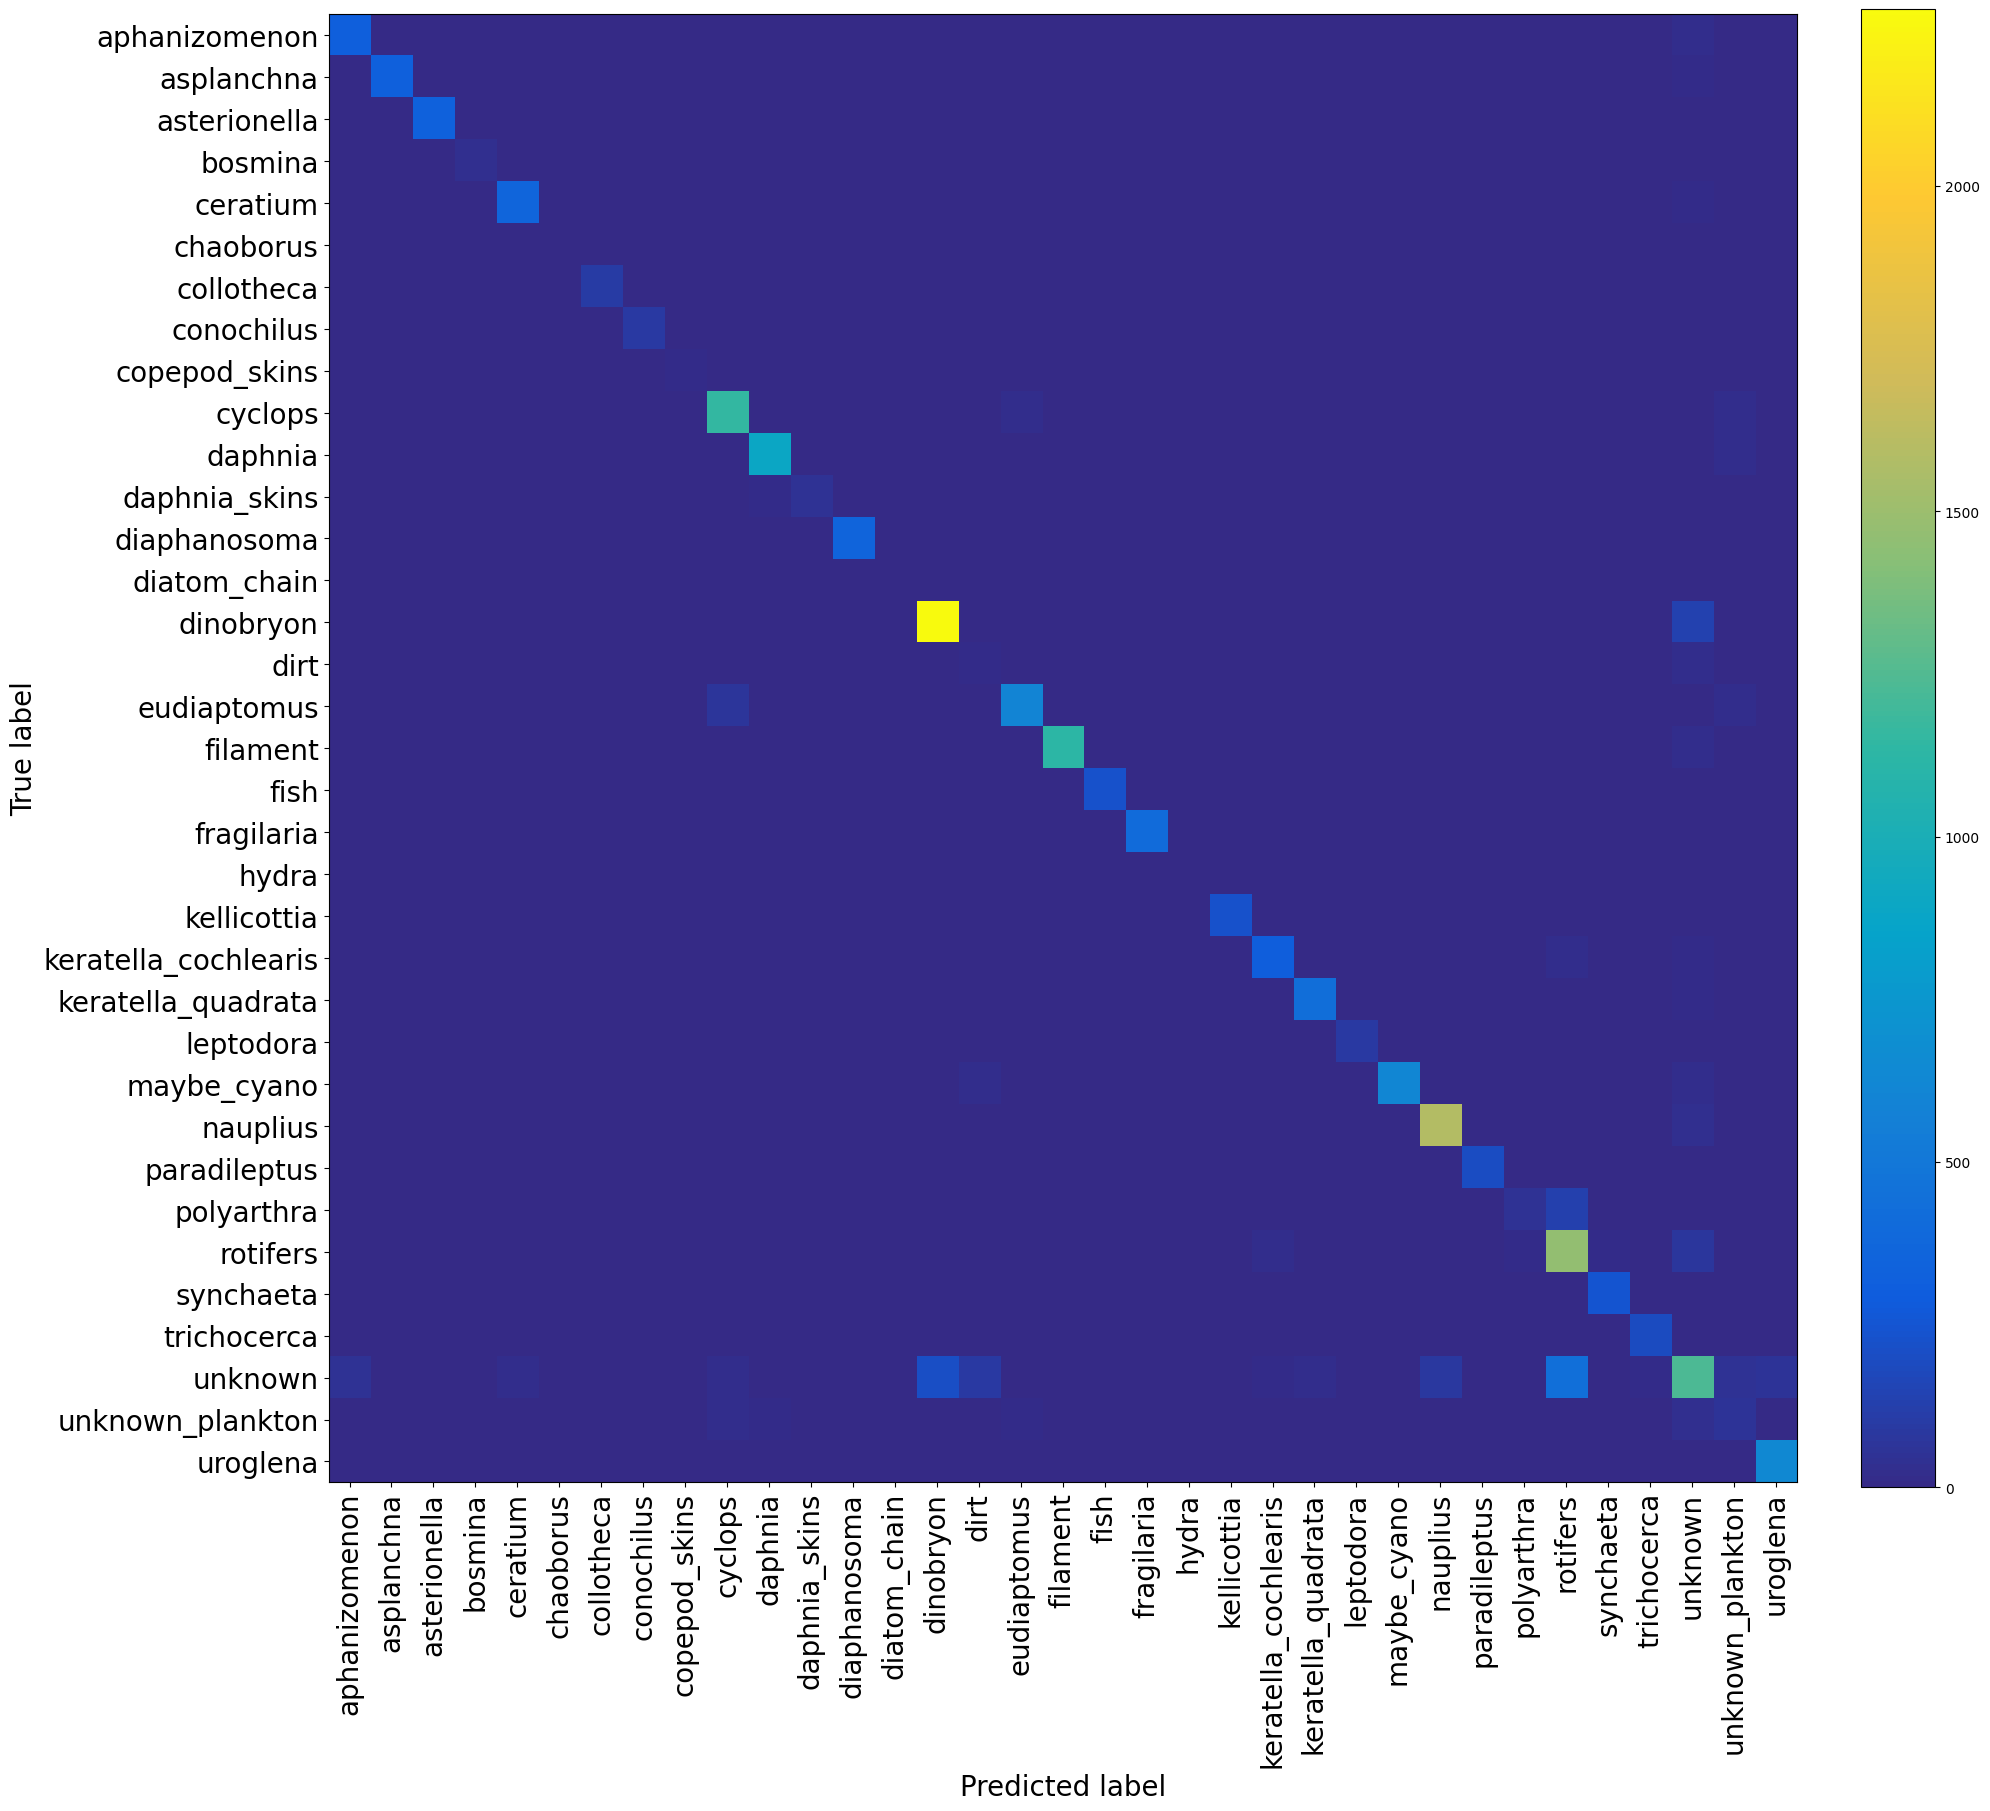

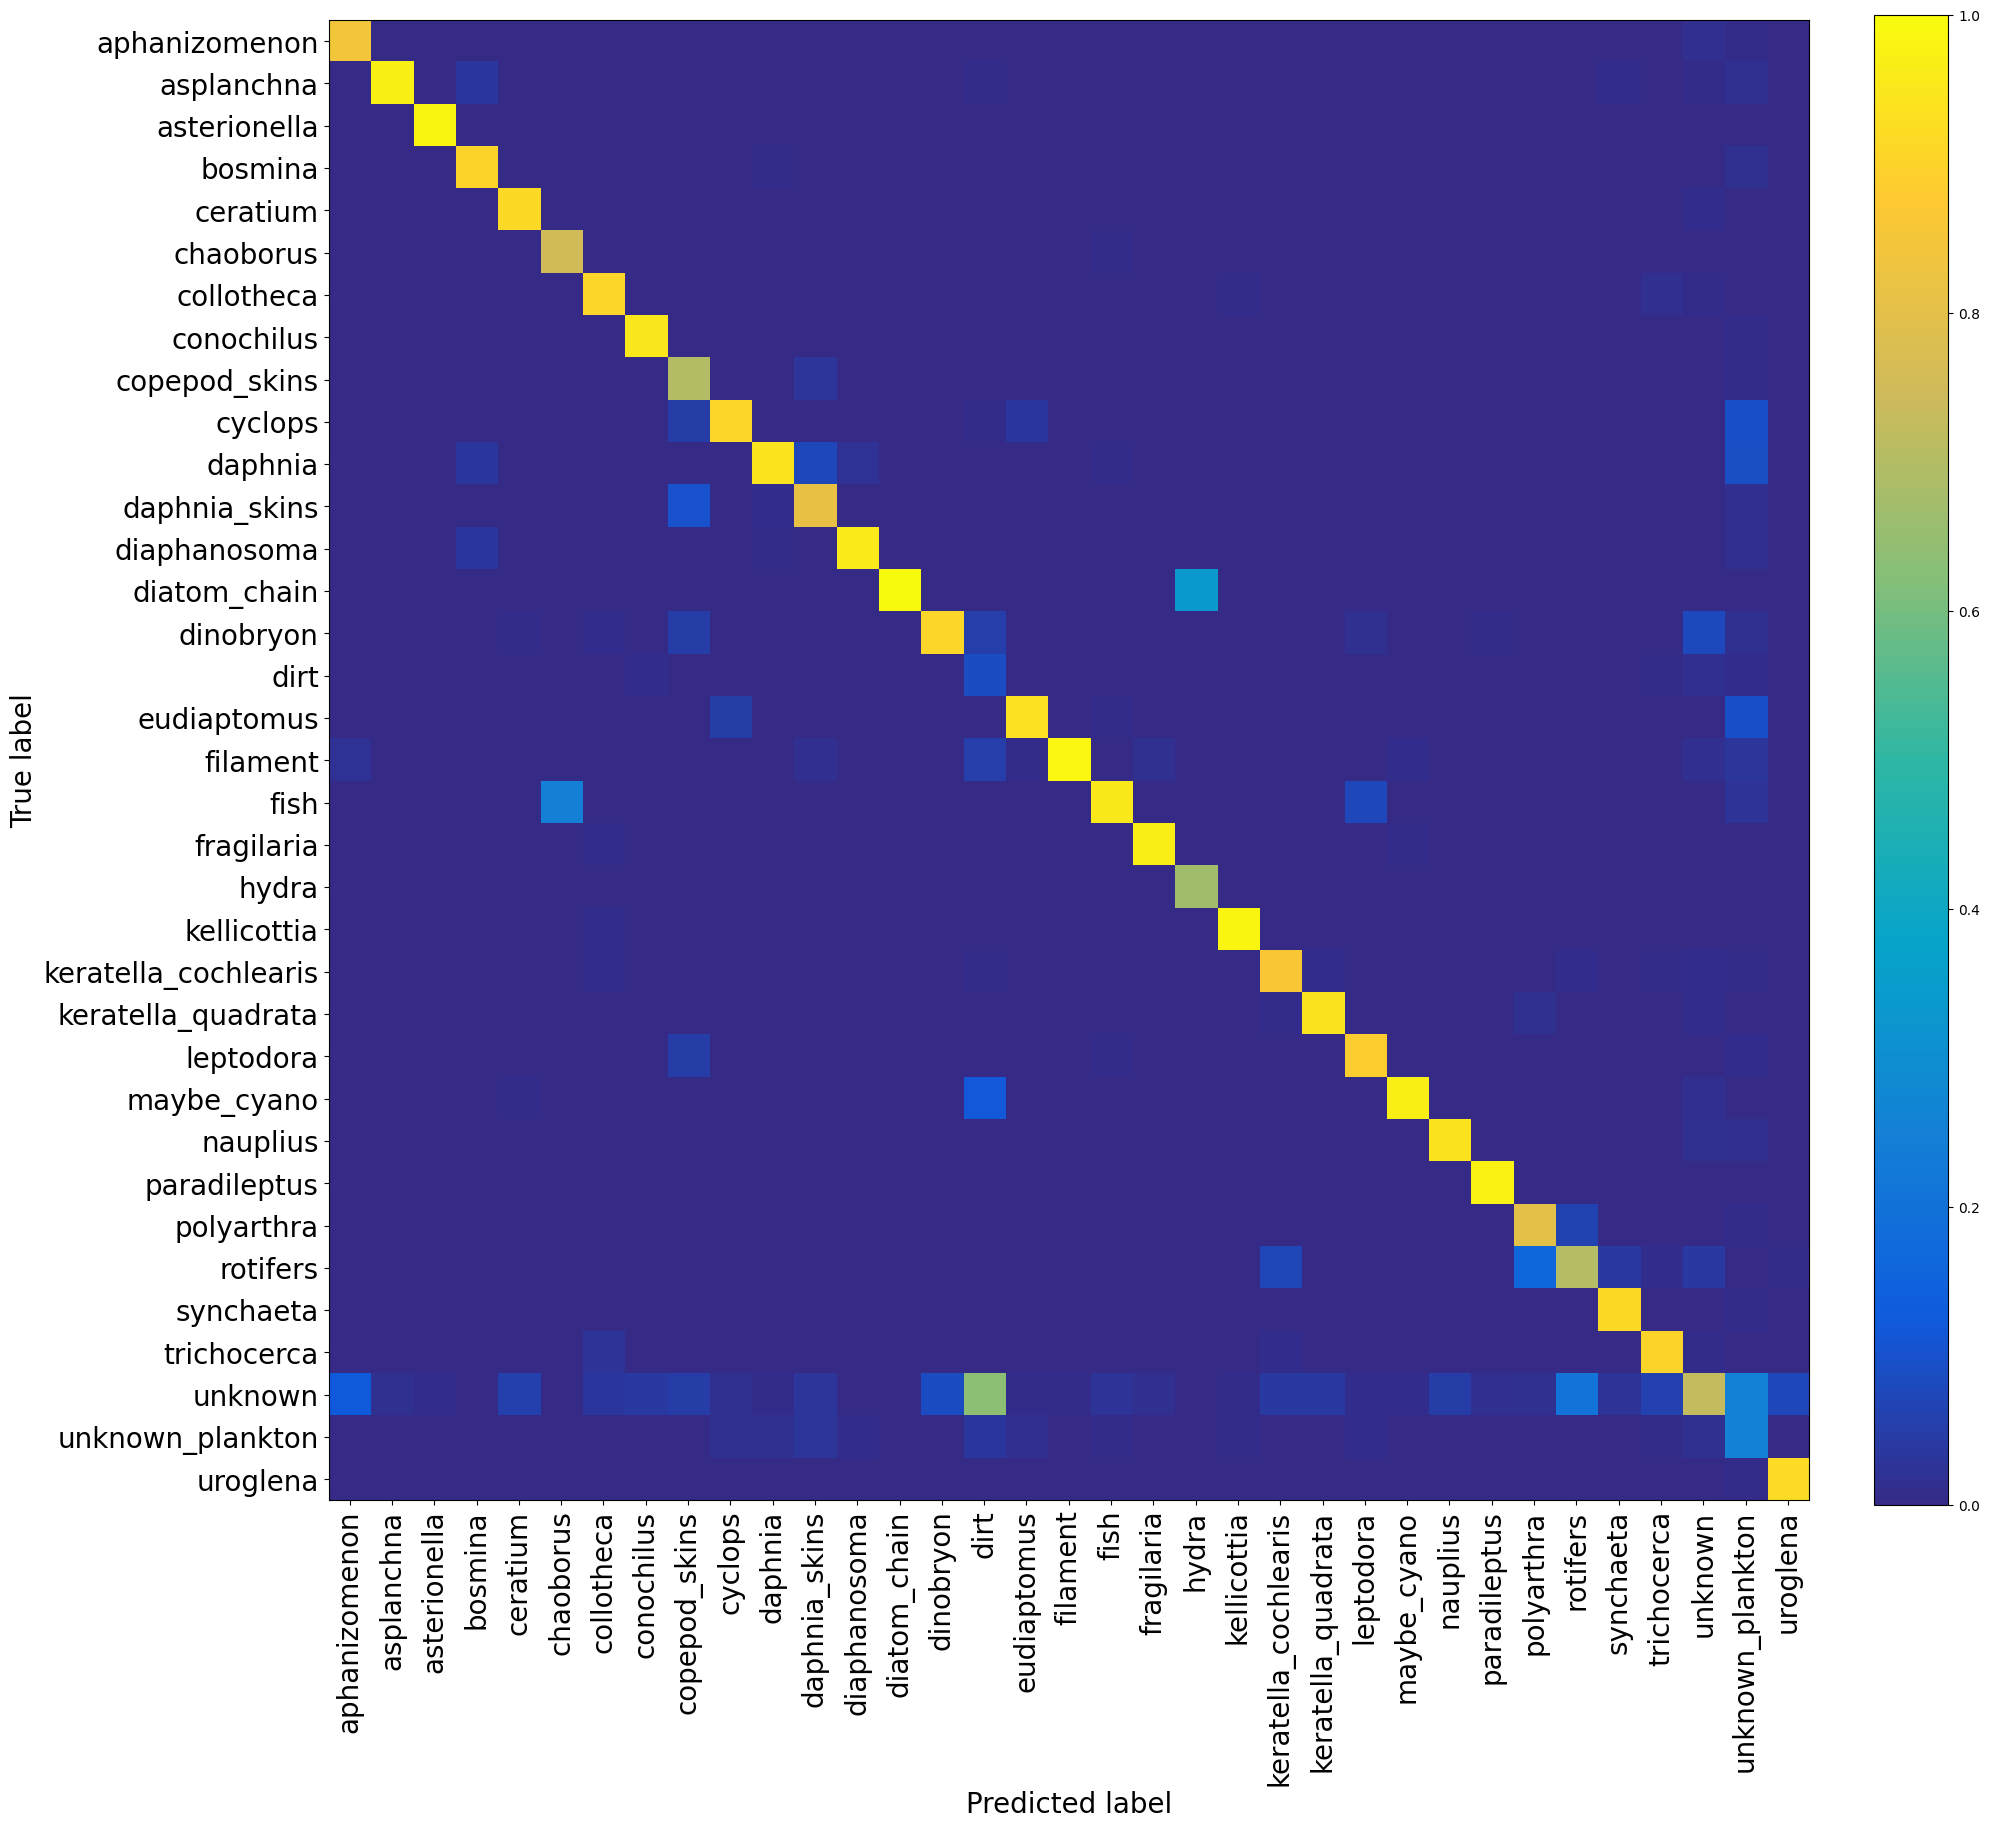

In [27]:
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
def cvd_colormap():
    """
    A color map accessible for people with color vision deficiency (CVD).
    """
    stops = [0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000]
    red = [0.2082, 0.0592, 0.0780, 0.0232, 0.1802, 0.5301, 0.8186, 0.9956, 0.9764]
    green = [0.1664, 0.3599, 0.5041, 0.6419, 0.7178, 0.7492, 0.7328, 0.7862, 0.9832]
    blue = [0.5293, 0.8684, 0.8385, 0.7914, 0.6425, 0.4662, 0.3499, 0.1968, 0.0539]

    # Create a dictionary with color information
    cdict = {
        "red": [(stops[i], red[i], red[i]) for i in range(len(stops))],
        "green": [(stops[i], green[i], green[i]) for i in range(len(stops))],
        "blue": [(stops[i], blue[i], blue[i]) for i in range(len(stops))],
    }

    # Create the colormap
    return LinearSegmentedColormap("CustomMap", segmentdata=cdict, N=255)

def plot_confusion_matrix(all_labels, all_preds, class_names):
    """
    Plot and return confusion matrices (absolute and normalized).

    Args:
        all_labels (torch.Tensor): True labels.
        all_preds (torch.Tensor): Predicted labels.
        class_names (list): List of class names.

    Returns:
        tuple: (figure for absolute confusion matrix, figure for normalized confusion matrix)
    """

    class_indices = np.arange(len(class_names))
    confusion_matrix = sklearn.metrics.confusion_matrix(all_labels.cpu(), all_preds.cpu(), labels=class_indices)
    confusion_matrix_norm = sklearn.metrics.confusion_matrix(all_labels.cpu(), all_preds.cpu(), normalize="pred", labels=class_indices)
    num_classes = confusion_matrix.shape[0]
    fig, ax = plt.subplots(figsize=(20, 20))
    fig2, ax2 = plt.subplots(figsize=(20, 20))

    if len(class_names) != num_classes:
        print(f"Warning: Number of class names ({len(class_names)}) does not match the number of classes ({num_classes}) in confusion matrix.")
        class_names = class_names[:num_classes]
    cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)

    cm_display_norm = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_norm, display_labels=class_names)
    cmap = cvd_colormap()

    cm_display.plot(cmap=cmap, ax=ax, xticks_rotation=90,colorbar=False,include_values=False)
    cm_display_norm.plot(cmap=cmap, ax=ax2, xticks_rotation=90,colorbar=False,include_values=False)
    mappable = cm_display.im_
    mappable_norm = cm_display_norm.im_

    cbar = plt.colorbar(mappable, ax=ax, fraction=0.046, pad=0.04)
    cbar_norm = plt.colorbar(mappable_norm, ax=ax2, fraction=0.046, pad=0.04)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    ax.set_xlabel("Predicted label", fontsize=20)
    ax.set_ylabel("True label", fontsize=20)
    ax2.set_xlabel("Predicted label", fontsize=20)
    ax2.set_ylabel("True label", fontsize=20)

    fig.tight_layout()
    fig2.tight_layout()
    return fig, fig2

fig,fig2=plot_confusion_matrix(torch.cat(labels), torch.cat(preds), model.class_map.keys())
fig.savefig(f"{dataset}_confusion_matrix.png")
fig2.savefig(f"{dataset}_confusion_matrix_normalized.png")

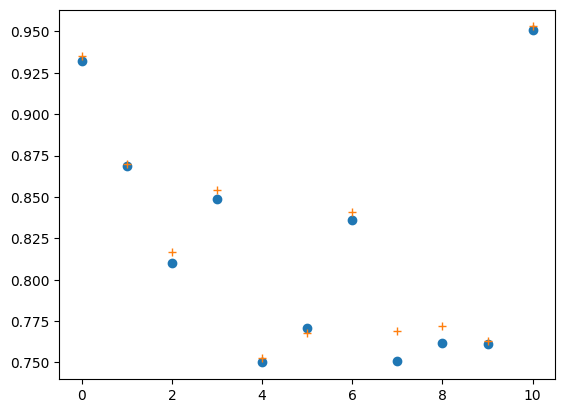

In [22]:
# accs_no_tta=accs

plt.plot(accs_new_tta,'o')
plt.plot(accs,'+')




In [19]:
accs_new_tta = accs

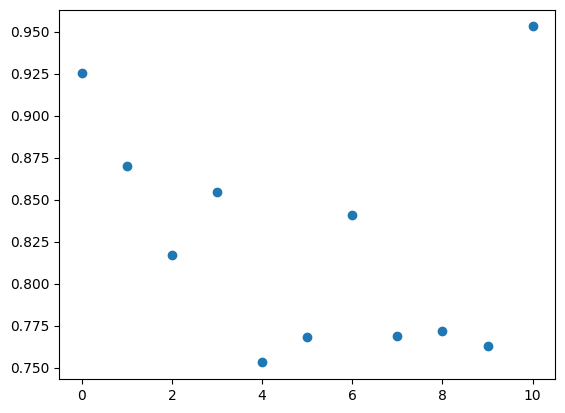

In [ ]:
plt.plot(accs,'x')


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


best_model_acc_stage2-epoch=17-val_acc=0.93.ckpt
best_model_acc_stage2-epoch=03-val_acc=0.91.ckpt
best_model_acc_stage2-epoch=05-val_acc=0.92.ckpt
best_model_acc_stage2-epoch=01-val_acc=0.86.ckpt
best_model_acc_stage2-epoch=13-val_acc=0.93.ckpt


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


85,791,206 total parameters.
85,791,206 training parameters.


/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/l ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pi

Number of classes: 38


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Number of classes: 38
Testing DataLoader 0:   0%|          | 0/10 [00:00<?, ?it/s]

/gpfs/dust/maxwell/user/kaechben/.conda/envs/eawag/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Testing DataLoader 0: 100%|██████████| 10/10 [01:04<00:00,  0.15it/s]

IndexError: list index out of range

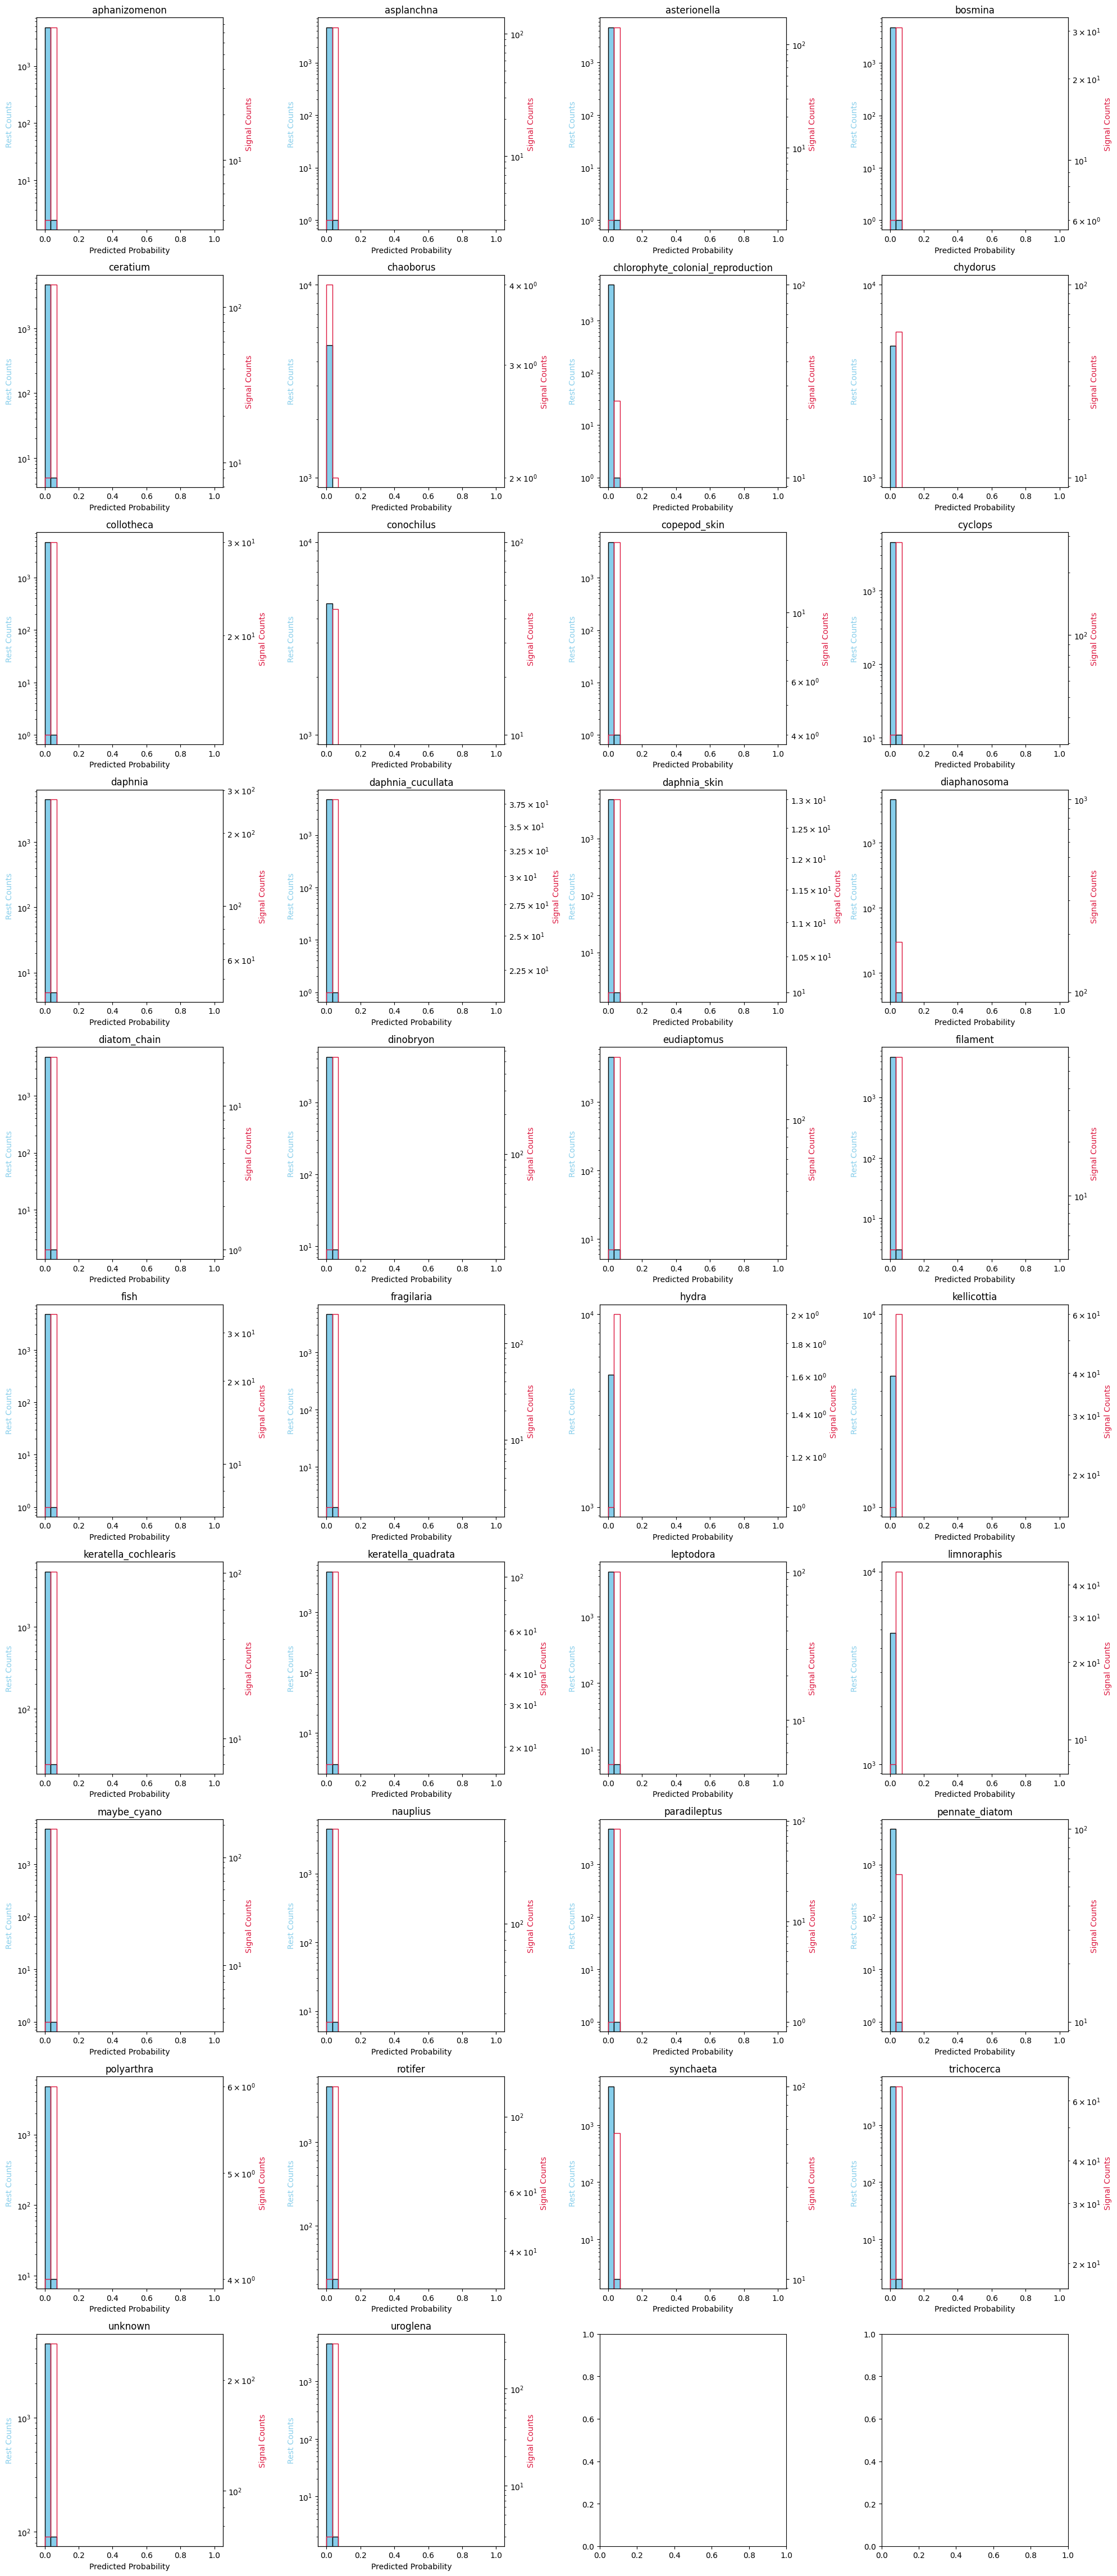

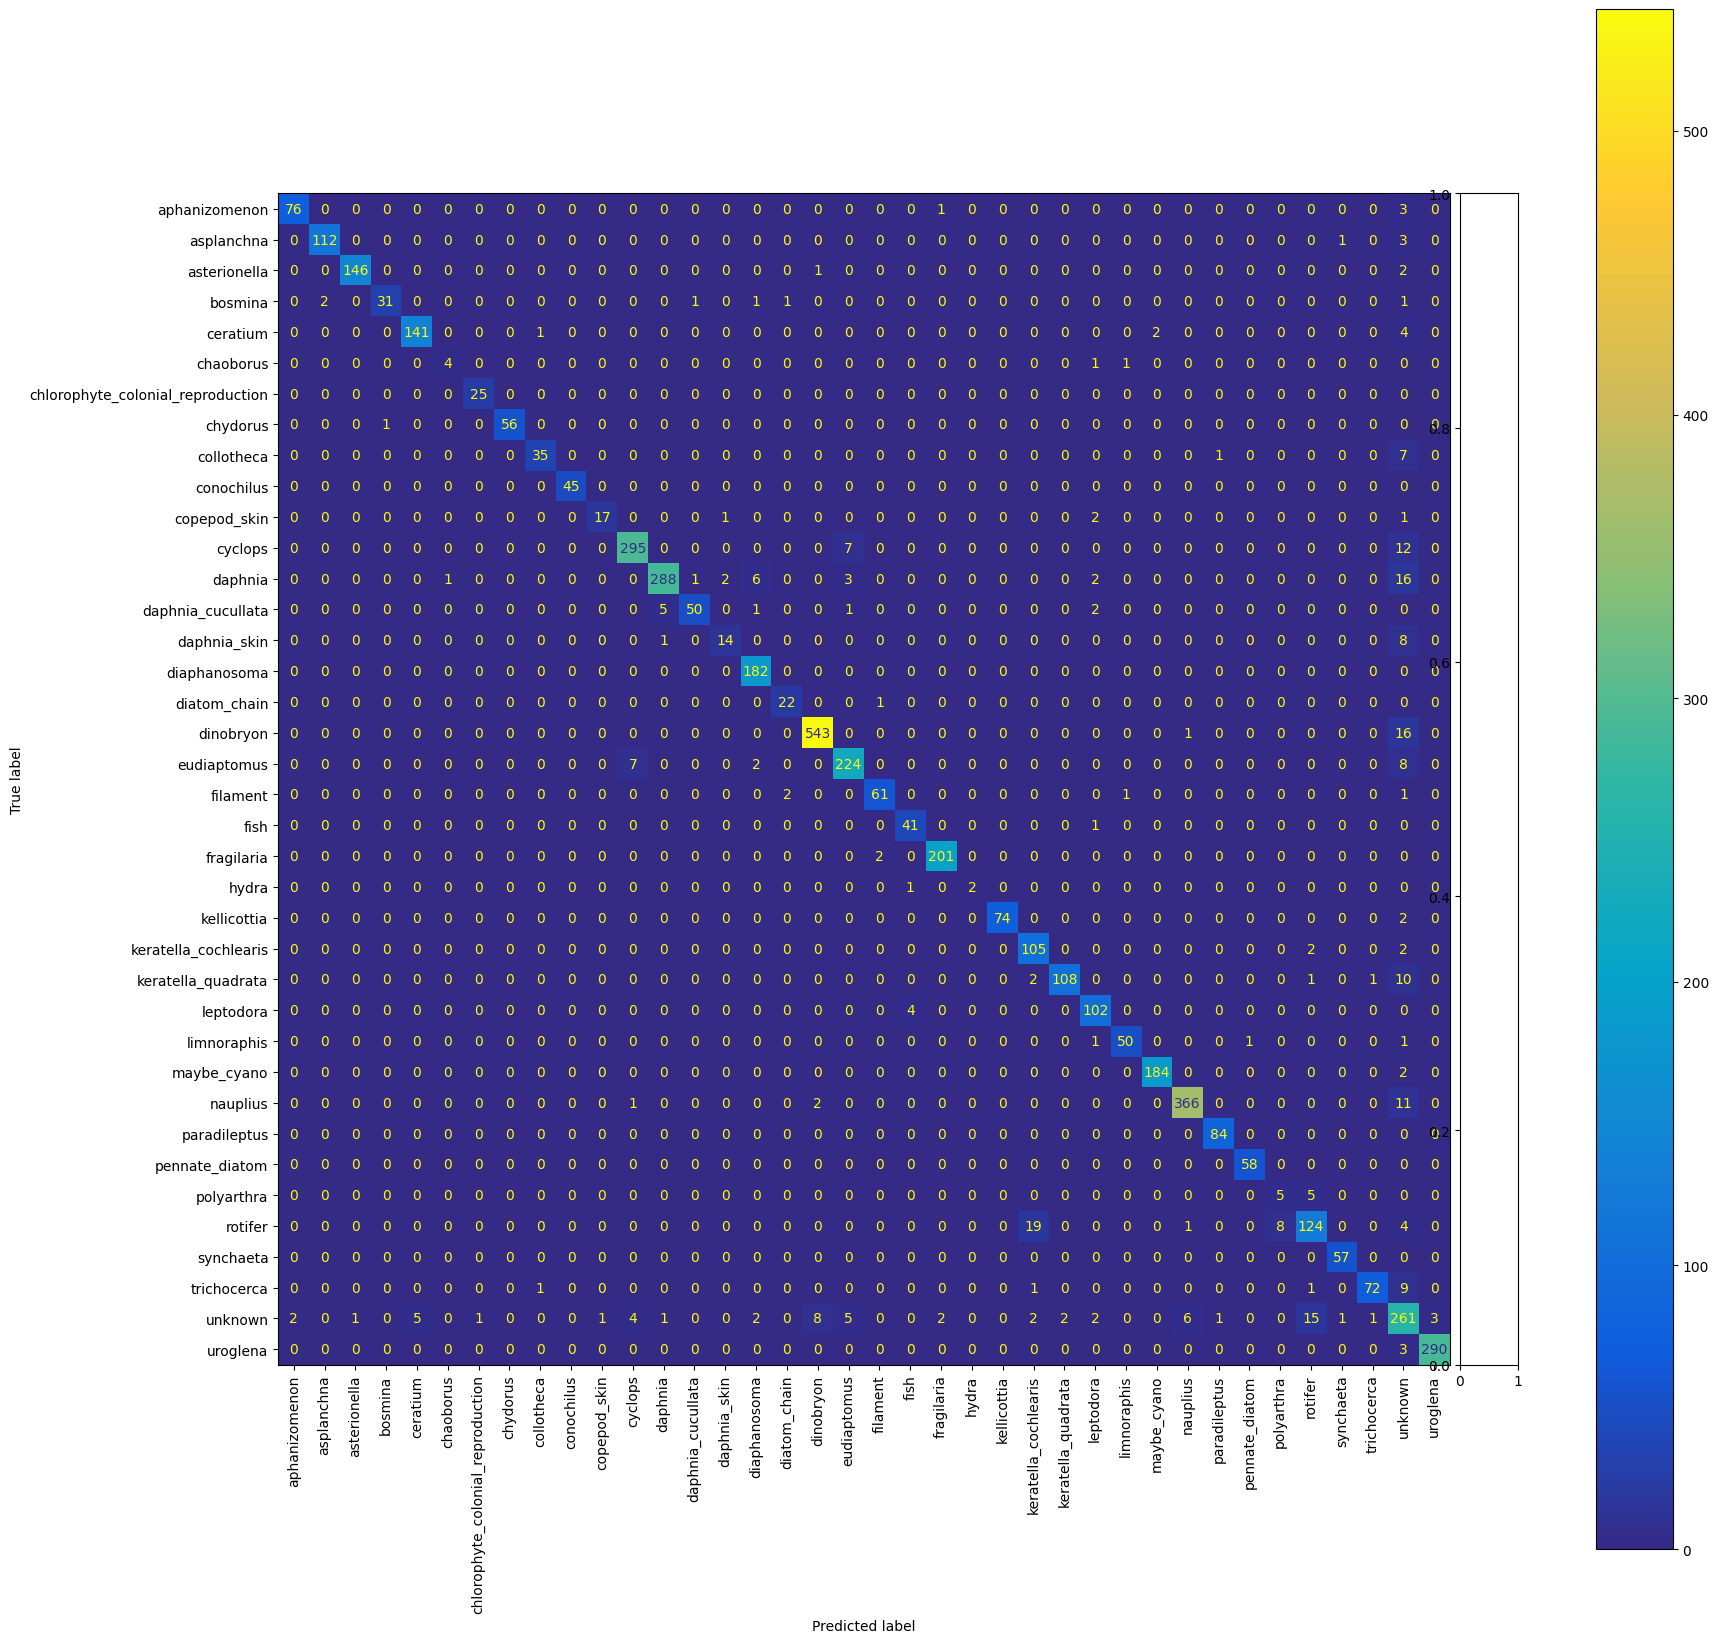

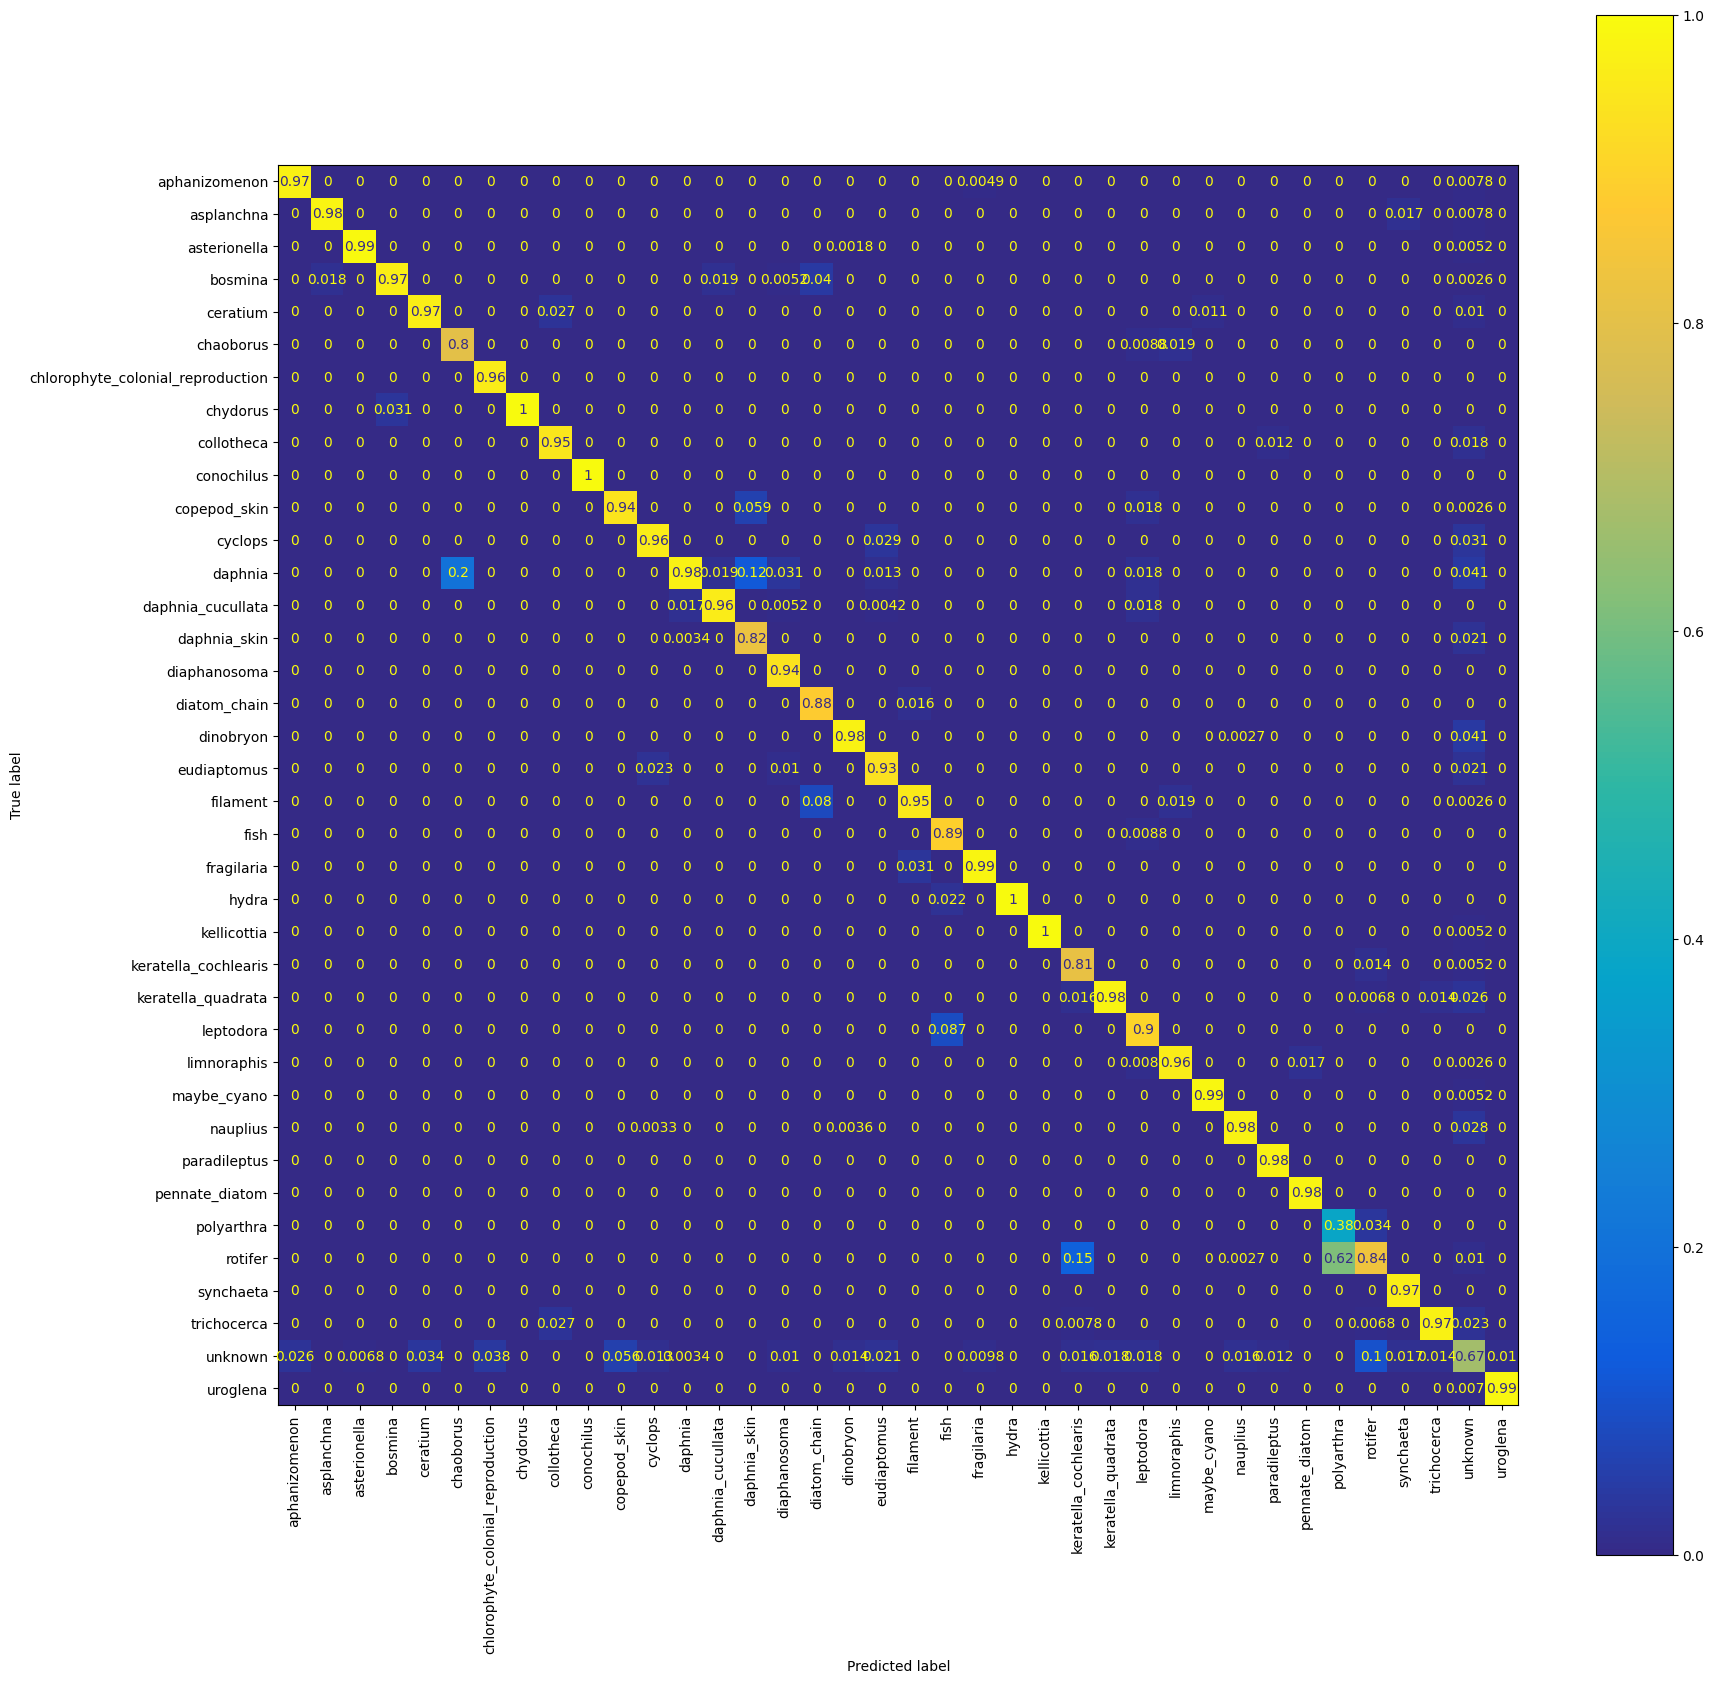

In [1]:
import torch
import os
import lightning.pytorch as pl
from lit_ecology_classifier.models.model import LitClassifier
from lit_ecology_classifier.data.datamodule import DataModule
from torch.utils.data import DataLoader
from scipy.stats import gmean
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Function to load multiple models
def load_models(model_paths, device):
    models = []
    for model_path in model_paths:
        model = LitClassifier.load_from_checkpoint(model_path)
        model.to(device)
        model.eval()
        models.append(model)
    return models

# Function to prepare the data module
def prepare_data_module(model):
    model.hparams.TTA = True
    model.hparams.testing = True
    model.hparams.split =[0,0]
    datamodule = DataModule(**(model.hparams), use_multi=False)
    datamodule.setup('fit')
    model.load_datamodule(datamodule)
    return datamodule

# Function for inference with ensemble
def ensemble_inference(models, dataloader, device):
    misclassified_images = []
    misclassified_correct_labels = []
    misclassified_labels = []
    correct_labels = []
    correct_images = []
    all_labels = []
    all_preds = []
    image_infos=val_dataloader.sampler.data_source.dataset.image_infos
    infos = []
    misclassified_infos = []
    k=0
    with torch.no_grad():
        for batch in dataloader:
            if models[0].hparams.TTA:
                rots = list(batch[0].keys())

                inputs = torch.cat([batch[0][ang] for ang in rots], dim=0).to(device)
                labels = batch[1].to(device)

                outputs_list = []
                for model in models:
                    outputs = model(inputs).softmax(dim=1)
                    outputs = torch.stack(torch.chunk(outputs, len(rots), dim=0)).cpu()
                    outputs_list.extend(outputs)


            else:
                images, labels = batch
                inputs, labels = images.to(device), labels.to(device)

                outputs_list = []
                for model in models:
                    outputs = model(inputs).softmax(dim=1).cpu()
                    outputs_list.append(outputs)

            outputs_ensemble = gmean(torch.stack(outputs_list), axis=0)

            preds = np.argmax(outputs_ensemble, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds)
            for i in range(len(preds)):
                if preds[i] != labels[i]:
                    misclassified_images.append(inputs[i].cpu())
                    misclassified_labels.append(preds[i])
                    misclassified_correct_labels.append(labels[i])
                    misclassified_infos.append(image_infos[k])
                if preds[i] == labels[i]:
                    correct_images.append(inputs[i].cpu())
                    correct_labels.append(preds[i])
                    infos.append(image_infos[k])
                k+=1
    return misclassified_images, misclassified_labels, misclassified_correct_labels, correct_images, correct_labels, all_labels, all_preds, infos, misclassified_infos

# Function to calculate F1 score
def calculates_scores(all_labels, all_preds):
    f1 = f1_score(all_labels, all_preds,average="weighted")
    print("F1 Score: ", f1)
    accuracy = np.mean(np.array(all_labels) == np.array(all_preds))
    print("Accuracy: ", accuracy)
    return f1, accuracy
# Function to denormalize images
def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).view(1, 3, 1, 1)
    std = torch.tensor(std).view(1, 3, 1, 1)
    tensor = tensor * std + mean
    return tensor
f1s=[]
accs=[]
dataset ="zoo3"
ckpt="21ypzfio"#["911xctua","gsyka9n2"]
model_path =     f'/beegfs/desy/user/kaechben/eawag/train_out/{dataset}/{ckpt}/checkpoints'
maxacc=0
for i,ckpt in enumerate(os.listdir(model_path)):
    if ckpt.find("val_acc=")!=-1:
        print(ckpt)
        if float(ckpt.split("val_acc=")[1].split(".ckpt")[0])>maxacc:
            best_ckpt=ckpt
            maxacc=float(ckpt.split("val_acc=")[1].split(".ckpt")[0])

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.makedirs(f"{dataset}_out",exist_ok=True)
# Load models
model = LitClassifier.load_from_checkpoint(os.path.join(model_path,best_ckpt))
# Setup DataLoader for validation
trainer = pl.Trainer()
hparams = model.hparams # copy the hyperparameters from the model
model.hparams.batch_size *= 4
model.hparams.TTA = True# set the TTA flag based on the argument
model.hparams.use_multi = False
data_module = DataModule(**model.hparams)
data_module.use_multi=False
model.hparams.outpath=f"{dataset}_out"
model.hparams.use_wandb=False
data_module.setup(stage="fit")
model.load_datamodule(data_module)

trainer = pl.Trainer(devices=1)
trainer.test(model, datamodule=data_module)






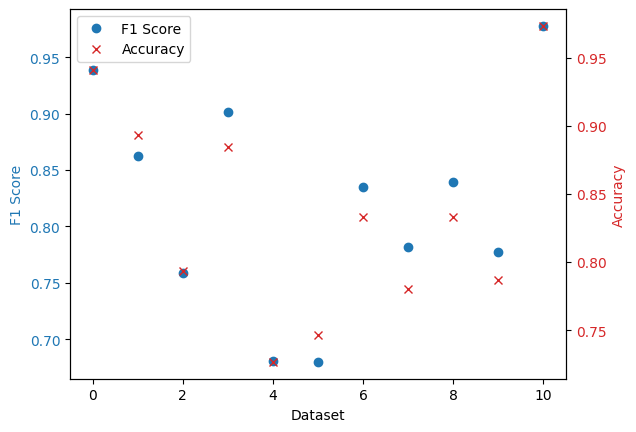

In [3]:
fig, ax1 = plt.subplots()

# Plotting F1 scores
f1_line, = ax1.plot(range(11), f1s, 'o', label='F1 Score', color='tab:blue')
ax1.set_xlabel("Dataset")
ax1.set_ylabel("F1 Score", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin of the original axis to plot accuracy
ax2 = ax1.twinx()
acc_line, = ax2.plot(range(11), accs, 'x', label='Accuracy', color='tab:red')
ax2.set_ylabel("Accuracy", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a legend that includes both plots
lines = [f1_line, acc_line]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels,)

In [5]:
datamodule.train_dataloader().dataset.dataset


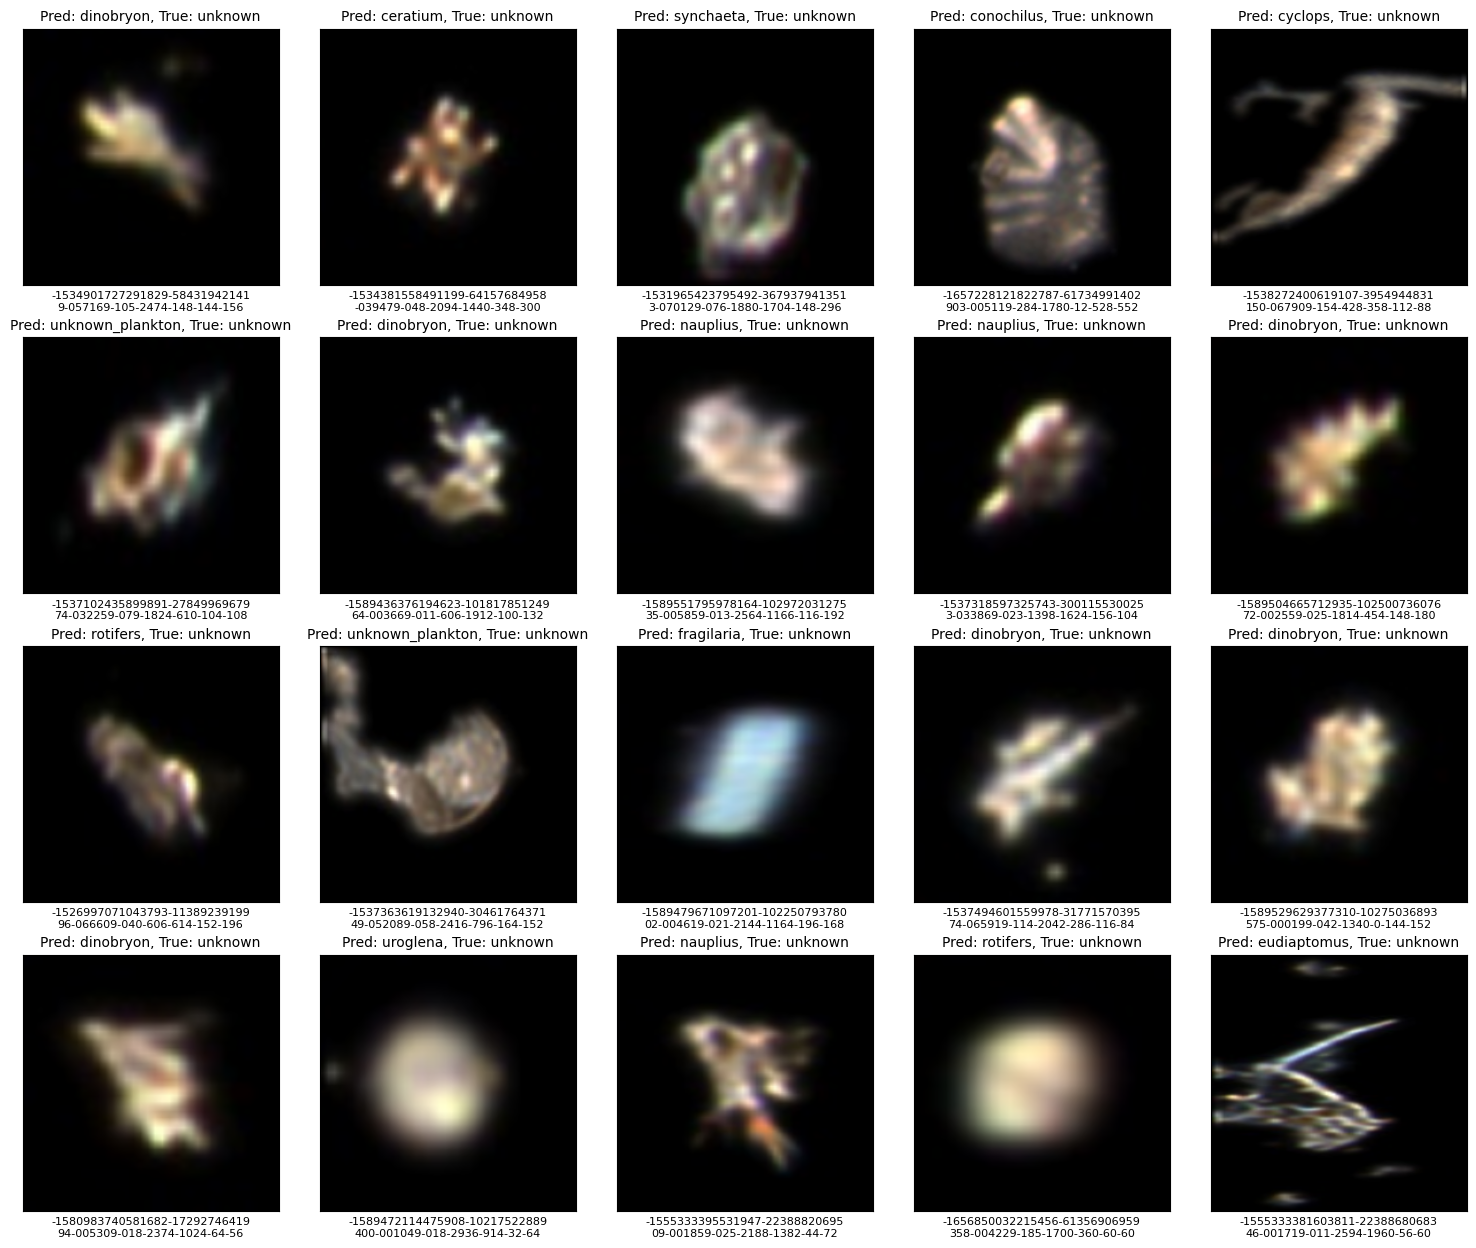

In [31]:
def split_text_middle(text):
    middle_index = len(text) // 2
    return text[:middle_index] + '\n' + text[middle_index:]

def plot_misclassifications(misclassified_images, misclassified_labels, misclassified_correct_labels, mean, std, class_names,which,correct,infos,misclassified_infos):

    num_images = len(misclassified_images)
    fig, axes = plt.subplots(nrows=4, ncols=min(num_images, 5), figsize=(15, 12.5))
    i=0
    k=0
    while i<20:

        if class_names[correct_labels[k].item() if correct else misclassified_correct_labels[k]]==which:
            ax = axes.flatten()[i]
            ax.set_yticks([])  # Remove y-axis ticks
            ax.set_xticks([])  # Remove y-axis ticks


            ax.set_ylabel('')  # Remove y-axis label

            img = (denormalize(correct_images[k].unsqueeze(0) if correct else misclassified_images[k].unsqueeze(0), mean, std).squeeze(0)).permute(1, 2, 0)
            ax.imshow(img)
            ax.set_title(f'Pred: {class_names[correct_labels[k].item() if correct else misclassified_labels[k]]}, True: {class_names[correct_labels[k].item() if correct else misclassified_correct_labels[k].item()]}',fontsize=10)
            label_text = split_text_middle(str(infos[k]).split(".")[0].split("X")[1] if correct else str(misclassified_infos[k]).split(".")[0].split("X")[1])

            ax.set_xlabel(label_text,fontsize=8)
            i+=1

        k+=1
    plt.tight_layout()

    plt.show()
# Denormalize and plot misclassifications
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
plot_misclassifications(misclassified_images, misclassified_labels, misclassified_correct_labels, mean, std, class_names,which="unknown",correct=False,infos=infos,misclassified_infos=misclassified_infos)


In [26]:
import torch
import random

def make_partial_trainable(model, trainable_fraction=0.1):
    """
    Set a fraction of the model's layers to be trainable.

    Args:
        model (torch.nn.Module): The PyTorch model from timm.
        trainable_fraction (float): The fraction of layers to be trainable.
    """
    # Collect all parameters and group them by layer/module
    layer_params = [(name, param) for name, param in model.named_parameters()]


    # Shuffle layer indices and select a fraction of layers to be trainable

    trainable_layers = layer_params[:5]+layer_params[-3:]

    # Set requires_grad to False for all layers first
    for _, param in layer_params:
        param.requires_grad = False

    # Enable training only on the selected layers
    for _, param in trainable_layers:
        param.requires_grad = True

    # Calculate the actual number of trainable parameters
    trainable_params = sum(p.numel() for _, p in trainable_layers)
    total_params = sum(p.numel() for _, p in layer_params)
    print(f"Trainable parameters: {trainable_params}")
    print(f"Total parameters: {total_params}")
    print(f"Fraction of trainable parameters: {trainable_params / total_params:.4f}")



# Example usage
model = Plankformer.load_from_checkpoint("/beegfs/desy/user/kaechben/eawag/train_out/zoo/ivccwcym/checkpoints/best_model_acc_stage1.ckpt")
make_partial_trainable(model, trainable_fraction=0.025)

# Verify the number of trainable parameters


85,788,899 total parameters.
27,683 training parameters.
Trainable parameters: 620579
Total parameters: 85788899
Fraction of trainable parameters: 0.0072
